In [ ]:
!pip install squarify

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [ ]:
# import data dan menampilkan data
data = ('/content/sample_data/SampleSuperstore.csv')
df = pd.read_csv(data)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Membuat Doughnut Chart

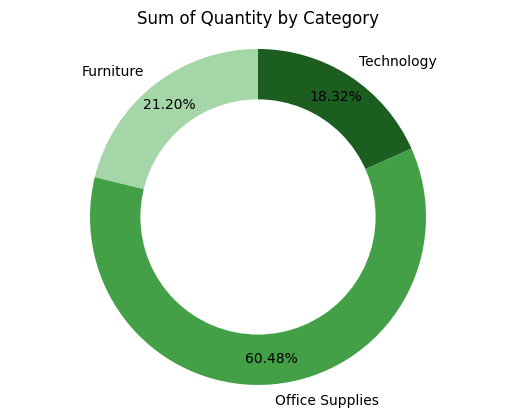

In [ ]:
# Mengelompokkan data berdasarkan 'Category' dan menghitung total 'Quantity'
category_quantity = df.groupby('Category')['Quantity'].sum()

# Menghitung persentase berdasarkan total Quantity
sizes = (category_quantity / category_quantity.sum()) * 100

labels = category_quantity.index
colors = ['#A5D6A7', '#43A047','#1B5E20']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%',
        startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Sum of Quantity by Category')
plt.show()



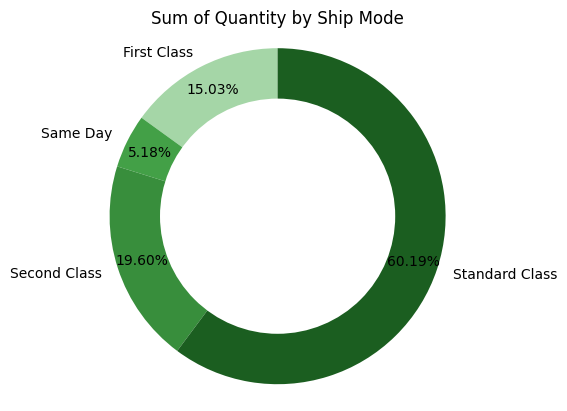

In [ ]:
# Mengelompokkan data berdasarkan 'Category' dan menghitung total 'Quantity'
shipmode_quantity = df.groupby('Ship Mode')['Quantity'].sum()

# Menghitung persentase berdasarkan total Quantity
sizes = (shipmode_quantity / shipmode_quantity.sum()) * 100

labels = shipmode_quantity.index
colors = ['#A5D6A7', '#43A047','#388E3C','#1B5E20']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%',
        startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Sum of Quantity by Ship Mode')
plt.show()


Membuat Barchart

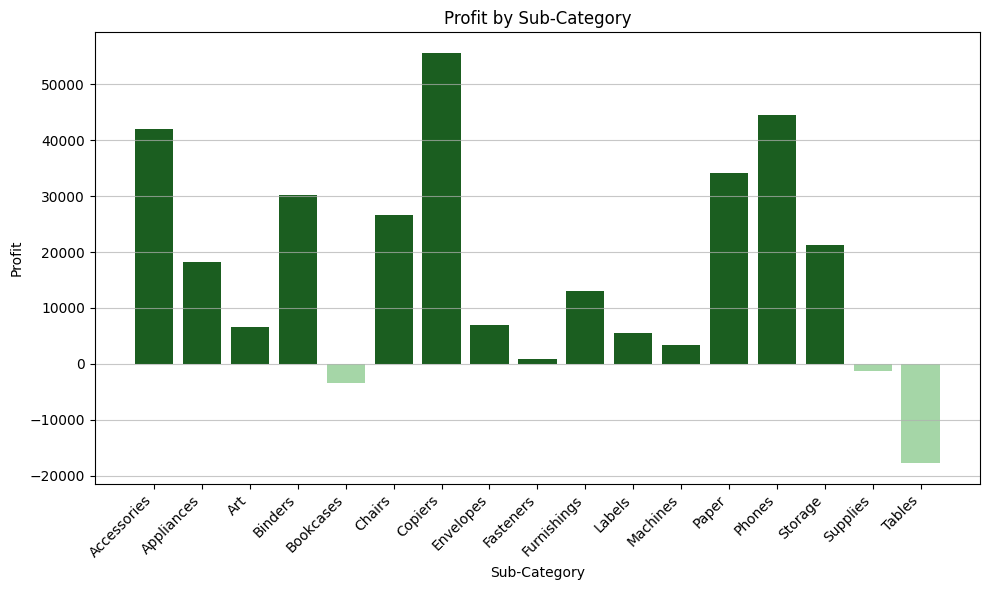

In [ ]:
# Mengambil kolom 'Sub-Category' dan menjumlahkan 'Profit' untuk setiap sub-kategori
profits = df.groupby('Sub-Category')['Profit'].sum()
sub_categories = profits.index

colors = ['#1B5E20' if profit > 0 else '#A5D6A7' for profit in profits]

plt.figure(figsize=(10, 6))
plt.bar(sub_categories, profits, color=colors)

plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit by Sub-Category')

plt.grid(True, axis='y', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Agar layout lebih rapi
plt.show()


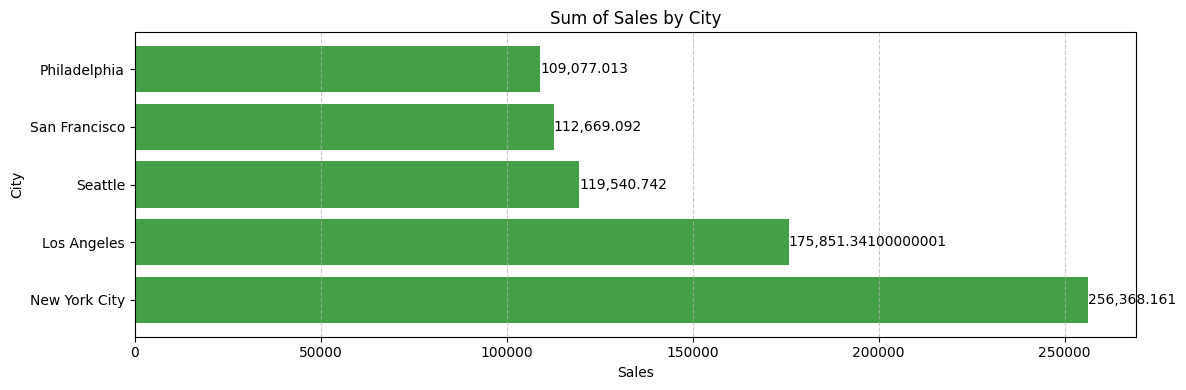

In [ ]:
# Mengambil kolom 'City' dan menjumlahkan 'Sales' untuk setiap kota
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Mengurutkan data berdasarkan nilai sales dan diambil 5 kota dengan sales terbanyak
city_sales = city_sales.sort_values(by='Sales', ascending=False).head(5)

plt.figure(figsize=(12, 4))
plt.barh(city_sales['City'], city_sales['Sales'], color='#43A047')

plt.xlabel('Sales')
plt.ylabel('City')
plt.title('Sum of Sales by City')

for index, value in enumerate(city_sales['Sales']):
    plt.text(value, index, f'{value:,}', va='center')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Membuat TreeMap

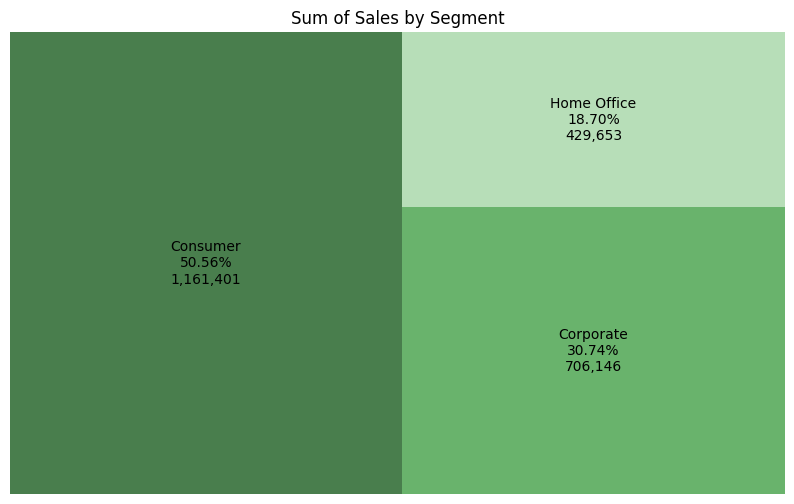

In [ ]:
# Mengambil kolom 'Segment' dan menjumlahkan 'Sales' persegmen
shipmode_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Menghitung persentase dari penjualan total
shipmode_sales['Percentage'] = shipmode_sales['Sales'] / shipmode_sales['Sales'].sum() * 100

labels = [f'{seg}\n{pct:.2f}%\n{sales:,.0f}' for seg, pct, sales in zip(shipmode_sales['Segment'], shipmode_sales['Percentage'], shipmode_sales['Sales'])]
colors = ['#1B5E20', '#43A047', '#A5D6A7']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=shipmode_sales['Sales'], label=labels, color=colors, alpha=0.8)

plt.title('Sum of Sales by Segment')

plt.axis('off')
plt.show()
